In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [87]:
data = pd.read_excel(/kaggle/input/credit-card-defaulter-prediction/Credit Card Defaulter Prediction.csv)

In [88]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 30000 entries, 0 to 29999

Data columns (total 25 columns):

 #   Column     Non-Null Count  Dtype

---  ------     --------------  -----

 0   ID         30000 non-null  int64

 1   LIMIT_BAL  30000 non-null  int64

 2   SEX        30000 non-null  int64

 3   EDUCATION  30000 non-null  int64

 4   MARRIAGE   30000 non-null  int64

 5   AGE        30000 non-null  int64

 6   PAY_0      30000 non-null  int64

 7   PAY_2      30000 non-null  int64

 8   PAY_3      30000 non-null  int64

 9   PAY_4      30000 non-null  int64

 10  PAY_5      30000 non-null  int64

 11  PAY_6      30000 non-null  int64

 12  BILL_AMT1  30000 non-null  int64

 13  BILL_AMT2  30000 non-null  int64

 14  BILL_AMT3  30000 non-null  int64

 15  BILL_AMT4  30000 non-null  int64

 16  BILL_AMT5  30000 non-null  int64

 17  BILL_AMT6  30000 non-null  int64

 18  PAY_AMT1   30000 non-null  int64

 19  PAY_AMT2   30000 non-null  int64

 20  PAY_AMT3   30000 non-null

In [90]:
data.shape

(30000, 25)

In [91]:
data.drop('ID', axis=1, inplace=True)

In [92]:
data.duplicated().sum()

35

In [93]:
data = data.drop_duplicates()

In [94]:
data.default.value_counts()

default
0    23335
1     6630
Name: count, dtype: int64

In [95]:
data.SEX.value_counts()

SEX
2    18091
1    11874
Name: count, dtype: int64

In [96]:
data.EDUCATION.value_counts()

EDUCATION
2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [97]:
data.MARRIAGE.value_counts()

MARRIAGE
2    15945
1    13643
3      323
0       54
Name: count, dtype: int64

In [98]:
import seaborn as sns

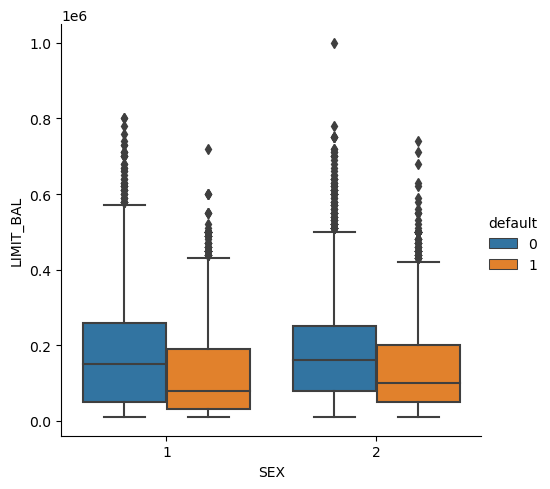

In [99]:
sns.catplot(x='SEX', y='LIMIT_BAL', hue='default', kind='box', data=data)

<Axes: >

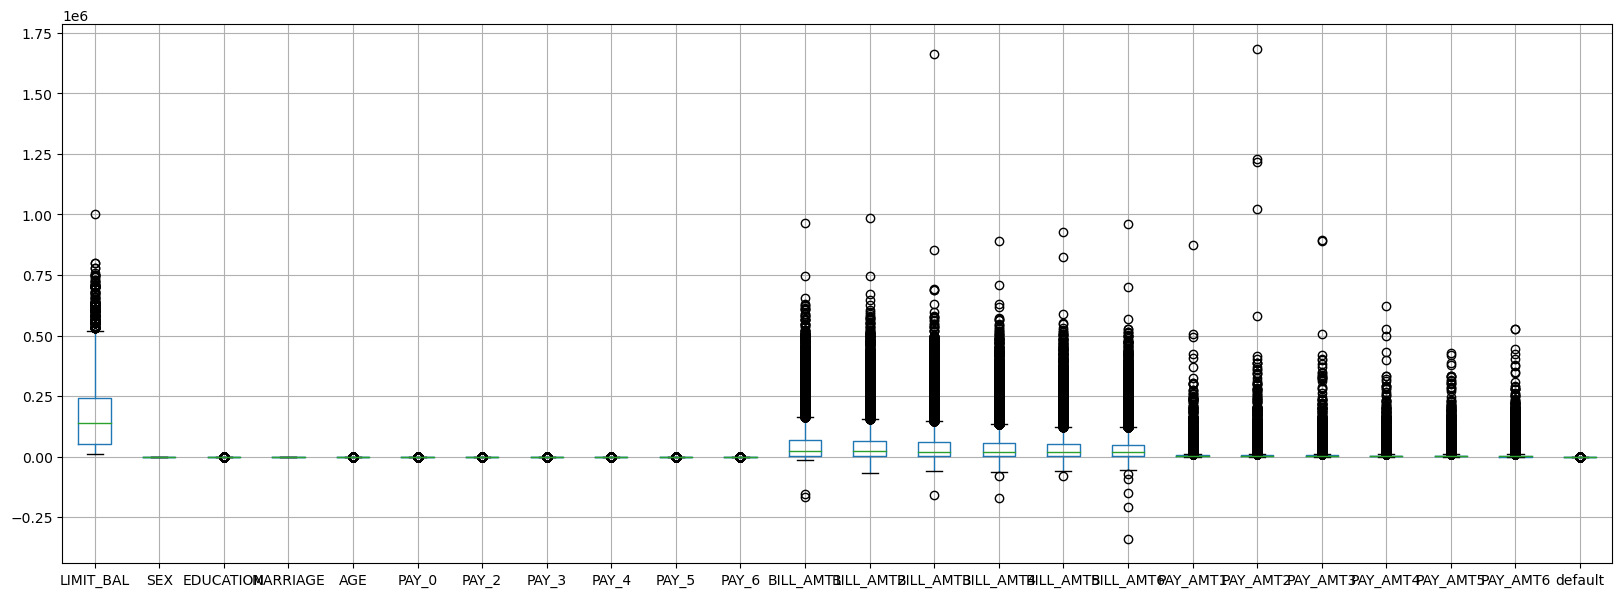

In [100]:
plt.figure(figsize=(20,7))
data.boxplot()

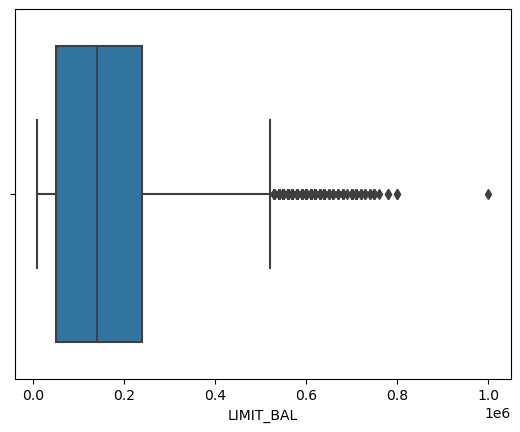

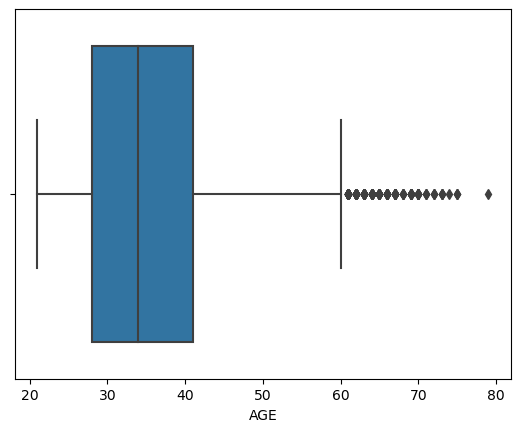

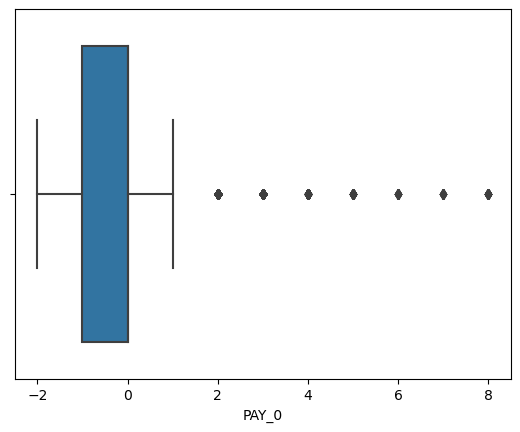

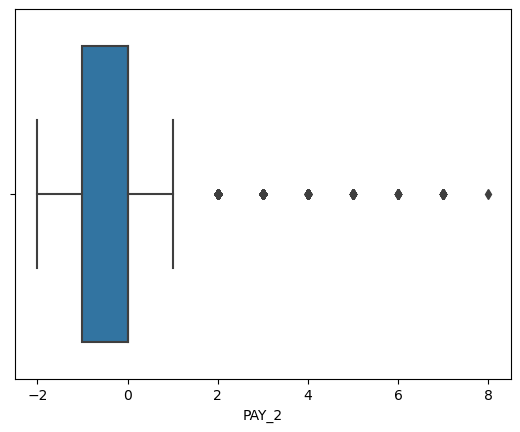

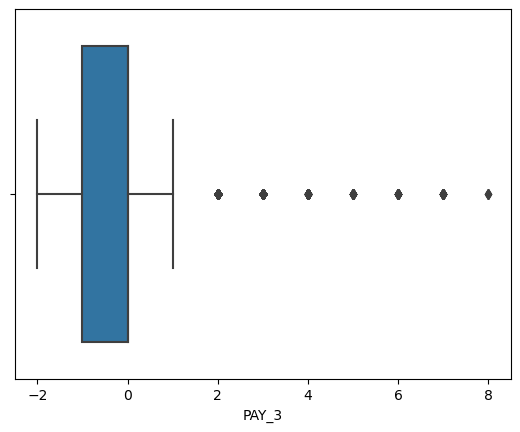

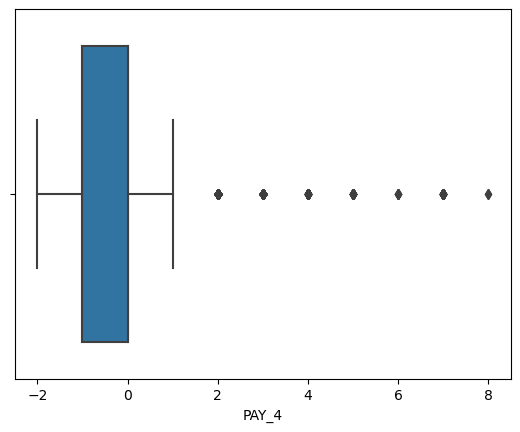

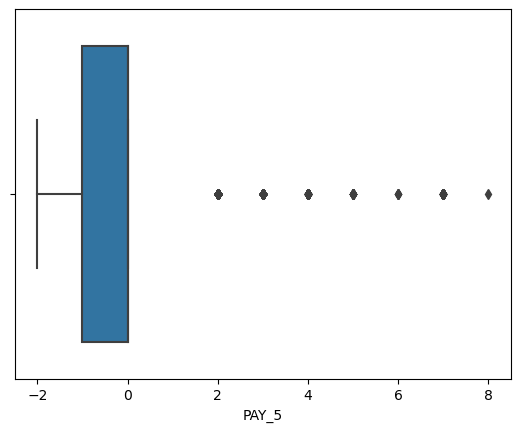

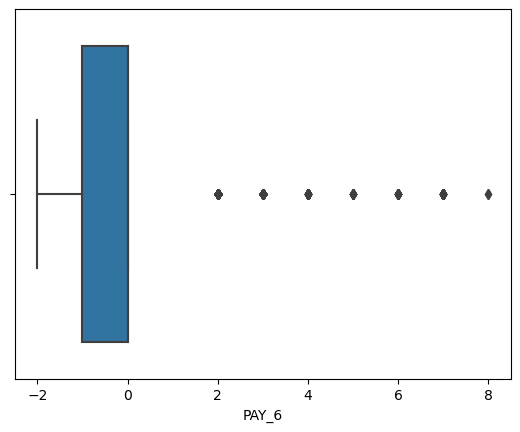

In [101]:
features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for feature in features:
    sns.boxplot(x=feature, data=data)
    plt.show()

<Axes: xlabel='PAY_AMT1'>

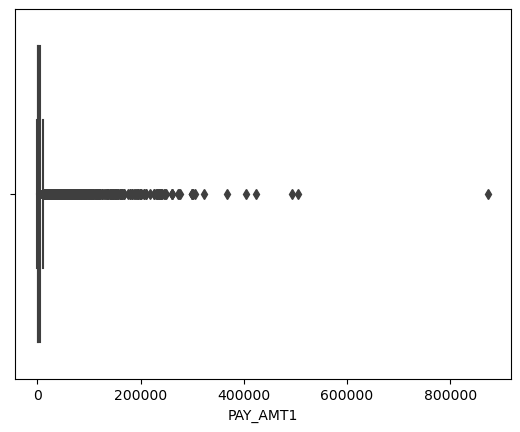

In [102]:
sns.boxplot(x='PAY_AMT1', data=data)

<Axes: xlabel='BILL_AMT1'>

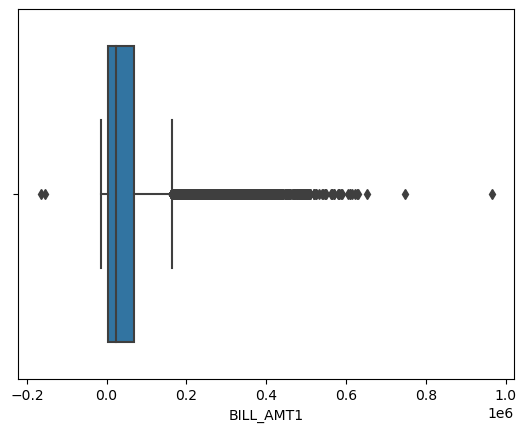

In [103]:
sns.boxplot(x='BILL_AMT1', data=data)

In [104]:
train = data[(data['AGE']<=60) & (data['PAY_0']<=2) & (data['PAY_2']<=2) & (data['PAY_3']<=2) & (data['PAY_4']<=2) & (data['PAY_5']<=2) & (data['PAY_6']<=2) & (data['LIMIT_BAL']<=600000)]

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>

Index: 28436 entries, 0 to 29999

Data columns (total 24 columns):

 #   Column     Non-Null Count  Dtype

---  ------     --------------  -----

 0   LIMIT_BAL  28436 non-null  int64

 1   SEX        28436 non-null  int64

 2   EDUCATION  28436 non-null  int64

 3   MARRIAGE   28436 non-null  int64

 4   AGE        28436 non-null  int64

 5   PAY_0      28436 non-null  int64

 6   PAY_2      28436 non-null  int64

 7   PAY_3      28436 non-null  int64

 8   PAY_4      28436 non-null  int64

 9   PAY_5      28436 non-null  int64

 10  PAY_6      28436 non-null  int64

 11  BILL_AMT1  28436 non-null  int64

 12  BILL_AMT2  28436 non-null  int64

 13  BILL_AMT3  28436 non-null  int64

 14  BILL_AMT4  28436 non-null  int64

 15  BILL_AMT5  28436 non-null  int64

 16  BILL_AMT6  28436 non-null  int64

 17  PAY_AMT1   28436 non-null  int64

 18  PAY_AMT2   28436 non-null  int64

 19  PAY_AMT3   28436 non-null  int64

 20  PAY_AMT4   28436 non-null  int

In [106]:
train.default.value_counts()

default
0    22629
1     5807
Name: count, dtype: int64

In [107]:
train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [108]:
train = pd.get_dummies(train,columns=['EDUCATION','MARRIAGE'], dtype=int, drop_first=True)

In [109]:
encoders_nums = {
                 "SEX":{2: 0, 1: 1}
}
train = train.replace(encoders_nums)

In [110]:
train

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,1,0,1,0,0,0,0,1,0,0
1,120000,0,26,-1,2,0,0,0,2,2682,...,1,0,1,0,0,0,0,0,1,0
2,90000,0,34,0,0,0,0,0,0,29239,...,0,0,1,0,0,0,0,0,1,0
3,50000,0,37,0,0,0,0,0,0,46990,...,0,0,1,0,0,0,0,1,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,1,34,2,2,2,2,2,2,72557,...,1,0,1,0,0,0,0,0,1,0
29995,220000,1,39,0,0,0,0,0,0,188948,...,0,0,0,1,0,0,0,1,0,0
29996,150000,1,43,-1,-1,-1,-1,0,0,1683,...,0,0,0,1,0,0,0,0,1,0
29998,80000,1,41,1,-1,0,0,0,-1,-1645,...,1,0,0,1,0,0,0,1,0,0


In [111]:
X = train.drop('default', axis=1)
y = train.default

In [112]:
y.value_counts()

default
0    22629
1     5807
Name: count, dtype: int64

In [113]:
columns = train.drop('default', axis=1).columns

In [114]:
columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [115]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X, y = sm.fit_resample(X, y)

In [116]:
y.value_counts()

default
1    22629
0    22629
Name: count, dtype: int64

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [119]:
X

array([[-1.10403881, -0.67676226, -1.3366177 , ...,  1.29653473,
        -0.87306697, -0.08196145],
       [-0.29436306, -0.67676226, -1.09677644, ..., -0.7712867 ,
         1.14538751, -0.08196145],
       [-0.53726578, -0.67676226, -0.13741138, ..., -0.7712867 ,
         1.14538751, -0.08196145],
       ...,
       [-0.05146034, -0.67676226, -0.13741138, ..., -0.7712867 ,
         1.14538751, -0.08196145],
       [-0.86113608, -0.67676226, -1.09677644, ..., -0.7712867 ,
        -0.87306697, -0.08196145],
       [-1.10403881, -0.67676226,  0.10242989, ..., -0.7712867 ,
        -0.87306697, -0.08196145]])

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , classification_report, roc_curve, roc_auc_score, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [122]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_test, y_test))

0.5519958756812491


# Logistic Regression

In [127]:
param_lr = {'penalty':['none','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [128]:
grid_lr = GridSearchCV(LogisticRegression(), param_lr, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 5)
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits

[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.816 total time=   0.0s

[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.822 total time=   0.0s

[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.828 total time=   0.0s

[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.821 total time=   0.0s

[CV 1/5] END .............C=0.001, penalty=none;, score=0.827 total time=   0.1s

[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.818 total time=   0.0s

[CV 2/5] END .............C=0.001, penalty=none;, score=0.817 total time=   0.1s

[CV 5/5] END .............C=0.001, penalty=none;, score=0.817 total time=   0.1s

[CV 4/5] END .............C=0.001, penalty=none;, score=0.820 total time=   0.1s

[CV 3/5] END .............C=0.001, penalty=none;, score=0.827 total time=   0.1s

[CV 1/5] END ................C=0.01, penalty=l2;, score=0.829 total time=   0.1s

[CV 2/5] END ..............C=0.01, p

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/sit

[CV 4/5] END ..............C=0.01, penalty=none;, score=0.820 total time=   0.1s

[CV 5/5] END ..............C=0.01, penalty=none;, score=0.817 total time=   0.1s

[CV 1/5] END ..............C=0.01, penalty=none;, score=0.827 total time=   0.1s

[CV 2/5] END ................C=0.01, penalty=l2;, score=0.817 total time=   0.1s

[CV 3/5] END ..............C=0.01, penalty=none;, score=0.827 total time=   0.1s

[CV 3/5] END ................C=0.01, penalty=l2;, score=0.828 total time=   0.1s

[CV 4/5] END ................C=0.01, penalty=l2;, score=0.822 total time=   0.1s

[CV 5/5] END ................C=0.01, penalty=l2;, score=0.817 total time=   0.1s

[CV 1/5] END ...............C=0.1, penalty=none;, score=0.827 total time=   0.1s

[CV 5/5] END ...............C=0.1, penalty=none;, score=0.817 total time=   0.1s

[CV 4/5] END .................C=0.1, penalty=l2;, score=0.821 total time=   0.1s

[CV 3/5] END ...............C=0.1, penalty=none;, score=0.827 total time=   0.1s

[CV 2/5] END ...

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/sit

[CV 2/5] END ...............C=0.1, penalty=none;, score=0.817 total time=   0.1s

[CV 1/5] END .................C=0.1, penalty=l2;, score=0.828 total time=   0.1s

[CV 3/5] END .................C=0.1, penalty=l2;, score=0.827 total time=   0.1s

[CV 5/5] END .................C=0.1, penalty=l2;, score=0.818 total time=   0.1s

[CV 4/5] END ...............C=0.1, penalty=none;, score=0.820 total time=   0.1s

[CV 1/5] END ...................C=1, penalty=l2;, score=0.828 total time=   0.1s

[CV 2/5] END .................C=1, penalty=none;, score=0.817 total time=   0.1s

[CV 4/5] END .................C=1, penalty=none;, score=0.820 total time=   0.1s

[CV 3/5] END ...................C=1, penalty=l2;, score=0.827 total time=   0.1s

[CV 5/5] END ...................C=1, penalty=l2;, score=0.817 total time=   0.1s

[CV 1/5] END ................C=10, penalty=none;, score=0.827 total time=   0.1s

[CV 1/5] END ...............C=100, penalty=none;, score=0.827 total time=   0.1s

[CV 5/5] END ...

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/sit

[CV 2/5] END ................C=10, penalty=none;, score=0.817 total time=   0.1s

[CV 1/5] END ..................C=10, penalty=l2;, score=0.827 total time=   0.1s

[CV 5/5] END ..................C=10, penalty=l2;, score=0.817 total time=   0.1s

[CV 4/5] END ................C=10, penalty=none;, score=0.820 total time=   0.1s

[CV 2/5] END ...............C=100, penalty=none;, score=0.817 total time=   0.2s

[CV 1/5] END .................C=100, penalty=l2;, score=0.827 total time=   0.1s

[CV 4/5] END ...............C=100, penalty=none;, score=0.820 total time=   0.2s

[CV 3/5] END ..................C=10, penalty=l2;, score=0.827 total time=   0.2s

[CV 5/5] END .................C=100, penalty=l2;, score=0.817 total time=   0.1s

[CV 3/5] END .................C=100, penalty=l2;, score=0.827 total time=   0.2s

[CV 1/5] END ..............C=1000, penalty=none;, score=0.827 total time=   0.1s

[CV 2/5] END ..............C=1000, penalty=none;, score=0.817 total time=   0.1s

[CV 4/5] END ...

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters

  warnings.warn(

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/sit

[CV 2/5] END ................C=1000, penalty=l2;, score=0.817 total time=   0.1s

[CV 4/5] END ................C=1000, penalty=l2;, score=0.820 total time=   0.1s

[CV 1/5] END ................C=1000, penalty=l2;, score=0.828 total time=   0.1s

[CV 3/5] END ................C=1000, penalty=l2;, score=0.827 total time=   0.1s

[CV 5/5] END ................C=1000, penalty=l2;, score=0.817 total time=   0.1s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['none', 'l2']},
             scoring='accuracy', verbose=3)

In [129]:
optimized_lr = grid_lr.best_estimator_

In [130]:
grid_lr.best_score_

0.8226641414141413

In [131]:
grid_lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [163]:
lr_train_pred = optimized_lr.predict(X_train)
lr_test_pred = optimized_lr.predict(X_test)

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("The accuracy on train data is ", accuracy_score(lr_train_pred,y_train))
print("The accuracy on test data is ", accuracy_score(lr_test_pred,y_test))
print("The precision on test data is ", precision_score(lr_test_pred,y_test))
print("The recall on test data is ", recall_score(lr_test_pred,y_test))
print("The f1 on test data is ", f1_score(lr_test_pred,y_test))
print("The roc_score on test data is ", roc_auc_score(lr_test_pred,y_test))

The accuracy on train data is  0.8236426767676768

The accuracy on test data is  0.8272941523051995

The precision on test data is  0.7109179313393251

The recall on test data is  0.9264592933947773

The f1 on test data is  0.8045018757815757

The roc_score on test data is  0.8460253456221198


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

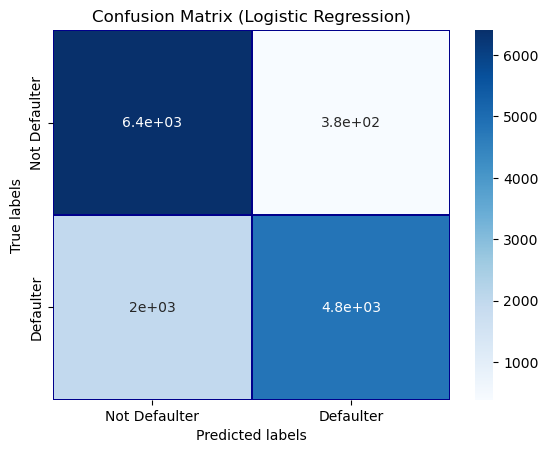

In [164]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, lr_test_pred)


ax= plt.subplot()
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax,
            linewidths=.2,linecolor="Darkblue", cmap="Blues") #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Logistic Regression)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

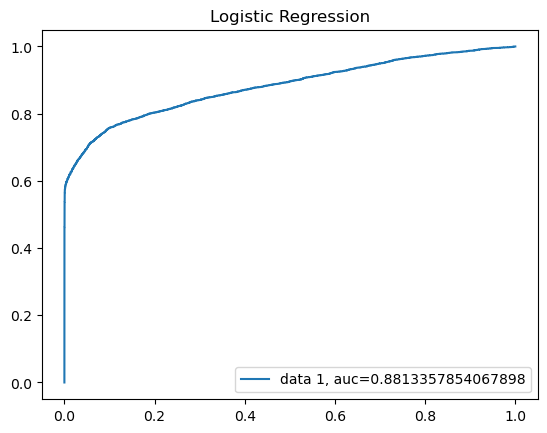

In [166]:
y_preds_proba_lr = optimized_lr.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Logistic Regression')
plt.legend(loc=4)
plt.show()

# Decision Tree

In [135]:
dt = DecisionTreeClassifier(max_depth=8, max_features=15, random_state=42)
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))

0.8015171601119458


In [136]:

param_dt = {
    'max_depth': [5, 10, 15],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [5,10,15,18]
}

grid_dt = GridSearchCV(estimator=dt, param_grid=param_dt, cv=4, scoring='accuracy', n_jobs=-1, verbose=3)

grid_dt.fit(X_train, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits

[CV 2/4] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2;, score=0.708 total time=   0.0s

[CV 1/4] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2;, score=0.701 total time=   0.1s

[CV 3/4] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2;, score=0.714 total time=   0.1s

[CV 2/4] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=5;, score=0.708 total time=   0.0s

[CV 4/4] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2;, score=0.698 total time=   0.0s

[CV 1/4] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=5;, score=0.701 total time=   0.0s

[CV 3/4] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=5;, score=0.714 total time=   0.0s

[CV 4/4] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=5;, score=0.698 total time=   0.0s

[CV 1/4]

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=8, max_features=15,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': [5, 10, 15, 18],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=3)

In [137]:
optimized_dt = grid_dt.best_estimator_

In [138]:
grid_dt.best_score_

0.8183396464646464

In [139]:
grid_dt.best_params_

{'max_depth': 10,
 'max_features': 18,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [167]:
dt_train_pred = optimized_dt.predict(X_train)
dt_test_pred = optimized_dt.predict(X_test)

In [168]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("The accuracy on train data is ", accuracy_score(dt_train_pred,y_train))
print("The accuracy on test data is ", accuracy_score(dt_test_pred,y_test))
print("The precision on test data is ", precision_score(dt_test_pred,y_test))
print("The recall on test data is ", recall_score(dt_test_pred,y_test))
print("The f1 on test data is ", f1_score(dt_test_pred,y_test))
print("The roc_score on test data is ", roc_auc_score(dt_test_pred,y_test))

The accuracy on train data is  0.8594065656565657

The accuracy on test data is  0.831639416703491

The precision on test data is  0.7664653013113305

The recall on test data is  0.881246823648992

The f1 on test data is  0.8198581560283689

The roc_score on test data is  0.837366082834268


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

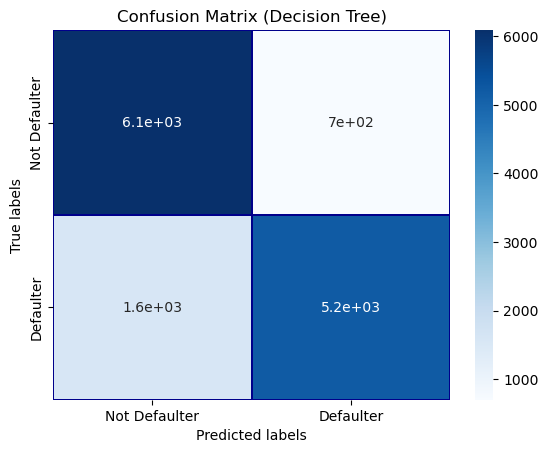

In [169]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, dt_test_pred)


ax= plt.subplot()
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax,
            linewidths=.2,linecolor="Darkblue", cmap="Blues") #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Decision Tree)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

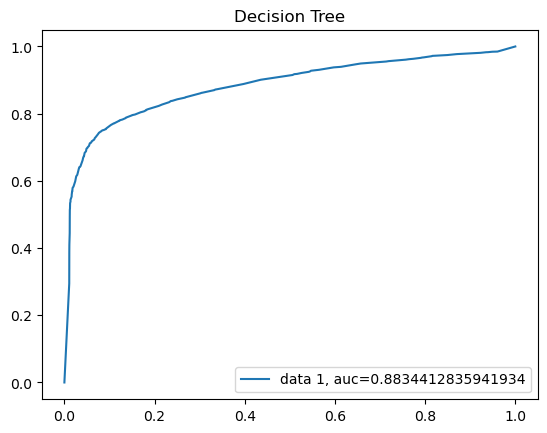

In [170]:
y_preds_proba_dt = optimized_dt.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_dt
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Decision Tree')
plt.legend(loc=4)
plt.show()

# Random Forest

In [144]:
rf = RandomForestClassifier(max_depth=10, max_features=15, random_state=42)
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))

0.8540285756370599


In [145]:

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of each tree
    # 'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    # 'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [5,10,15,18]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, scoring='accuracy', n_jobs=-1, verbose=3)

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits

[CV 2/4] END max_depth=5, max_features=5, n_estimators=100;, score=0.797 total time=   2.5s

[CV 3/4] END max_depth=5, max_features=5, n_estimators=100;, score=0.802 total time=   2.6s

[CV 1/4] END max_depth=5, max_features=5, n_estimators=100;, score=0.795 total time=   2.6s

[CV 4/4] END max_depth=5, max_features=5, n_estimators=100;, score=0.791 total time=   2.7s

[CV 2/4] END max_depth=5, max_features=5, n_estimators=200;, score=0.798 total time=   5.1s

[CV 1/4] END max_depth=5, max_features=5, n_estimators=200;, score=0.798 total time=   5.2s

[CV 4/4] END max_depth=5, max_features=5, n_estimators=200;, score=0.792 total time=   5.2s

[CV 3/4] END max_depth=5, max_features=5, n_estimators=200;, score=0.804 total time=   5.4s

[CV 1/4] END max_depth=5, max_features=10, n_estimators=100;, score=0.812 total time=   4.4s

[CV 2/4] END max_depth=5, max_features=10, n_estimators=100;, score=0.803 total time=   4.4s

[CV 1

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=10, max_features=15,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': [5, 10, 15, 18],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [146]:
optimized_rf = grid_search.best_estimator_

In [147]:
grid_search.best_score_

0.8595012626262626

In [148]:
grid_search.best_params_

{'max_depth': 15, 'max_features': 18, 'n_estimators': 300}

In [171]:
rf_train_pred = optimized_rf.predict(X_train)
rf_test_pred = optimized_rf.predict(X_test)

In [172]:
print("The accuracy on train data is ", accuracy_score(rf_train_pred,y_train))
print("The accuracy on test data is ", accuracy_score(rf_test_pred,y_test))
print("The precision on test data is ", precision_score(rf_test_pred,y_test))
print("The recall on test data is ", recall_score(rf_test_pred,y_test))
print("The f1 on test data is ", f1_score(rf_test_pred,y_test))
print("The roc_score on test data is ", roc_auc_score(rf_test_pred,y_test))

The accuracy on train data is  0.9504103535353535

The accuracy on test data is  0.8675062601266755

The precision on test data is  0.8018270222484161

The recall on test data is  0.9229986431478969

The f1 on test data is  0.8581565875581487

The roc_score on test data is  0.8739570148829826


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

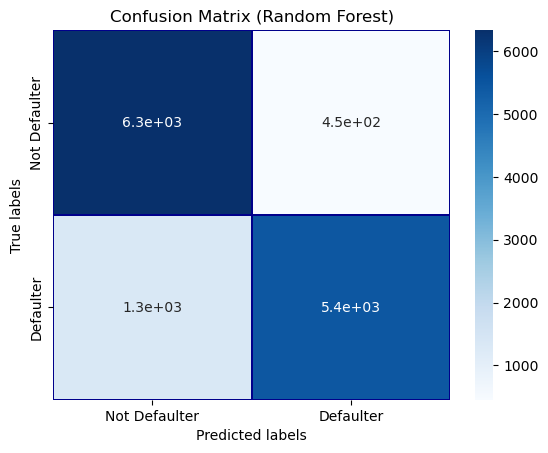

In [173]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, rf_test_pred)


ax= plt.subplot()
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax,
            linewidths=.2,linecolor="Darkblue", cmap="Blues") #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Random Forest)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

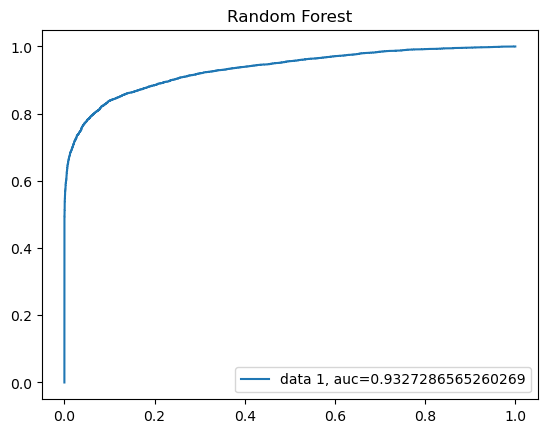

In [174]:
y_preds_proba_rf = optimized_rf.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Random Forest')
plt.legend(loc=4)
plt.show()

# XGBoost

In [153]:
xgb = XGBClassifier(objective='binary:logistic')
parm_xgb = {'max_depth': [15, 18, 22, 25], 'n_estimators': [250, 300, 400], 'learning_rate':[0.01, 0.05, 0.1]}
grid_xgb = GridSearchCV(estimator=xgb, param_grid=parm_xgb , scoring='accuracy', cv = 5, n_jobs=-1, verbose=3)
grid_result =grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits

[CV 1/5] END learning_rate=0.01, max_depth=15, n_estimators=250;, score=0.861 total time=  51.8s

[CV 3/5] END learning_rate=0.01, max_depth=15, n_estimators=250;, score=0.866 total time=  52.3s

[CV 2/5] END learning_rate=0.01, max_depth=15, n_estimators=250;, score=0.856 total time=  52.4s

[CV 5/5] END learning_rate=0.01, max_depth=15, n_estimators=250;, score=0.854 total time=  52.5s

[CV 4/5] END learning_rate=0.01, max_depth=15, n_estimators=250;, score=0.854 total time=  52.5s

[CV 4/5] END learning_rate=0.01, max_depth=15, n_estimators=300;, score=0.854 total time= 1.0min

[CV 2/5] END learning_rate=0.01, max_depth=15, n_estimators=300;, score=0.857 total time= 1.0min

[CV 5/5] END learning_rate=0.01, max_depth=15, n_estimators=300;, score=0.857 total time= 1.0min

[CV 1/5] END learning_rate=0.01, max_depth=15, n_estimators=300;, score=0.862 total time= 1.0min

[CV 3/5] END learning_rate=0.01, max_depth=15, n_estima

/Users/abhirup/miniconda3/envs/tensorflow/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

  warnings.warn(


[CV 3/5] END learning_rate=0.01, max_depth=18, n_estimators=400;, score=0.872 total time= 1.6min

[CV 4/5] END learning_rate=0.01, max_depth=18, n_estimators=400;, score=0.861 total time= 1.6min

[CV 5/5] END learning_rate=0.01, max_depth=18, n_estimators=400;, score=0.859 total time= 1.6min

[CV 4/5] END learning_rate=0.01, max_depth=22, n_estimators=250;, score=0.856 total time= 1.1min

[CV 1/5] END learning_rate=0.01, max_depth=22, n_estimators=250;, score=0.858 total time= 1.1min

[CV 2/5] END learning_rate=0.01, max_depth=22, n_estimators=250;, score=0.861 total time= 1.1min

[CV 3/5] END learning_rate=0.01, max_depth=22, n_estimators=250;, score=0.866 total time= 1.1min

[CV 5/5] END learning_rate=0.01, max_depth=22, n_estimators=250;, score=0.855 total time= 1.1min

[CV 1/5] END learning_rate=0.01, max_depth=22, n_estimators=300;, score=0.863 total time= 1.3min

[CV 3/5] END learning_rate=0.01, max_depth=22, n_estimators=300;, score=0.870 total time= 1.3min

[CV 4/5] END learnin

In [154]:
optimized_xgb = grid_xgb.best_estimator_

In [155]:
grid_xgb.best_score_

0.8726010101010102

In [156]:
grid_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 400}

In [175]:
xgb_train_pred = optimized_xgb.predict(X_train)
xgb_test_pred = optimized_xgb.predict(X_test)

In [176]:
y_train.shape

(31680,)

In [177]:
print("The accuracy on train data is ", accuracy_score(xgb_train_pred,y_train))
print("The accuracy on test data is ", accuracy_score(xgb_test_pred,y_test))
print("The precision on test data is ", precision_score(xgb_test_pred,y_test))
print("The recall on test data is ", recall_score(xgb_test_pred,y_test))
print("The f1 on test data is ", f1_score(xgb_test_pred,y_test))
print("The roc_score on test data is ", roc_auc_score(xgb_test_pred,y_test))

The accuracy on train data is  0.9996527777777777

The accuracy on test data is  0.8802474591250552

The precision on test data is  0.8320318255488434

The recall on test data is  0.920756562856677

The f1 on test data is  0.8741486068111455

The roc_score on test data is  0.8838168307903264


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

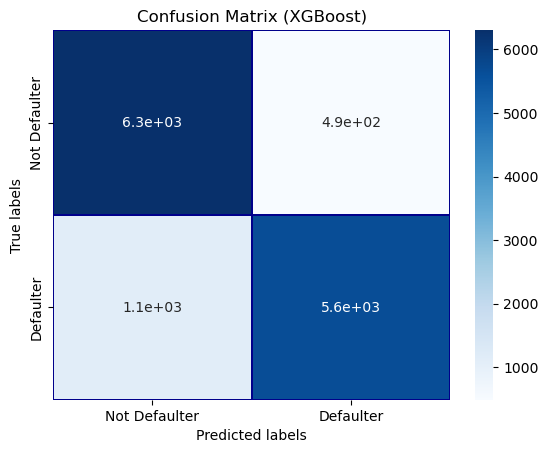

In [178]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, xgb_test_pred)


ax= plt.subplot()
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax,
            linewidths=.2,linecolor="Darkblue", cmap="Blues") #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (XGBoost)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

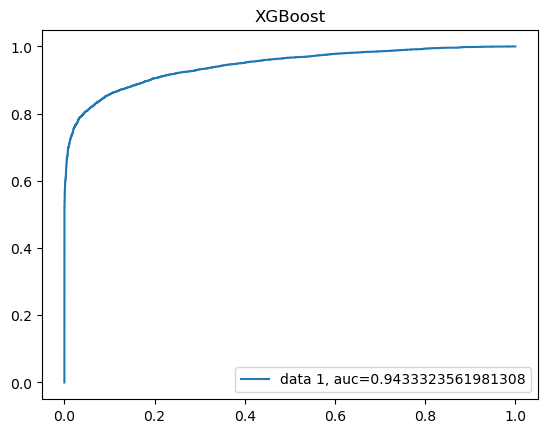

In [179]:
y_preds_proba_xgb = optimized_xgb.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('XGBoost')
plt.legend(loc=4)
plt.show()

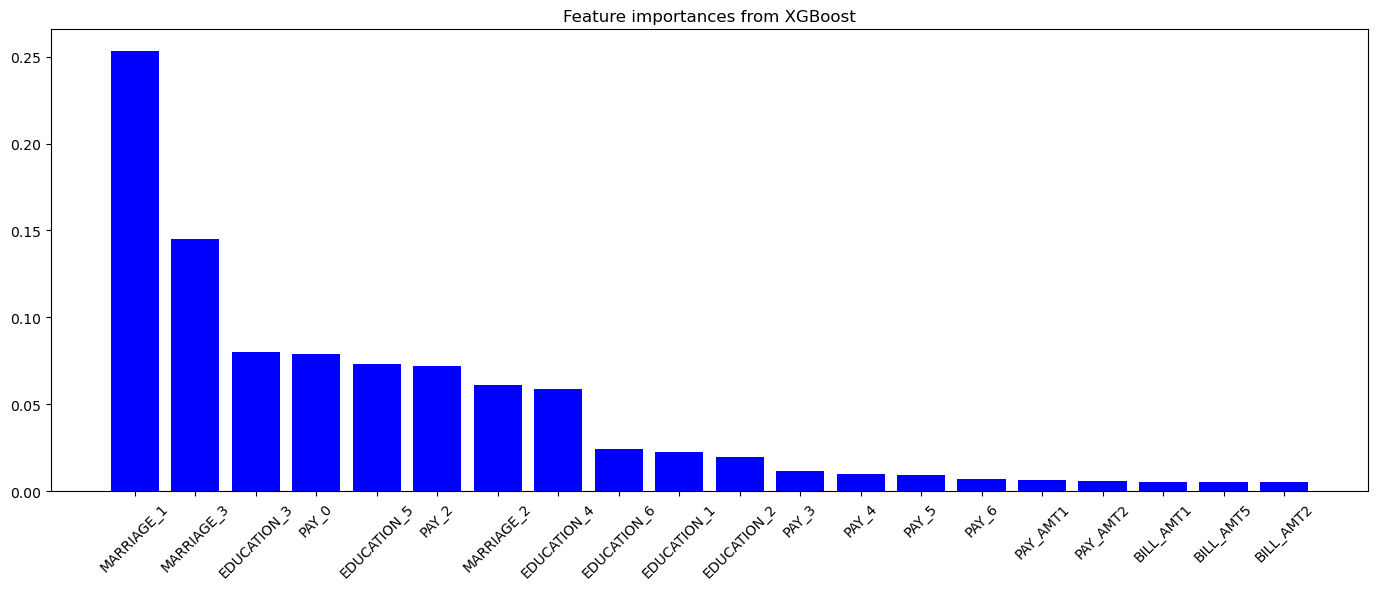

In [180]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimized_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:20]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances from XGBoost")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 45)
#plt.xlim([-1, X.shape[1]])
plt.show()